In [ ]:
import os
os.chdir('../')
os.getcwd()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib.colors import LogNorm

In [4]:
PATH_MUSHROOM_RESULT = "./mlruns/14/e53d5a2f77de495b899162ddc6d61ae4/artifacts/all_results.csv"
PATH_BANKNOTE_RESULT = "./mlruns/14/030d84262c43483a8cc5efd55da014a5/artifacts/all_results.csv"
PATH_DEFAULT_RESULT = "./mlruns/14/b9c12f86651f4f1c98357919f7ae17f0/artifacts/all_results.csv"
PATH_CONCRETE_RESULT = "./mlruns/14/d181501ee28d462e897856d5204ce459/artifacts/all_results.csv"
PATH_QSAR_RESULT = "./mlruns/14/75d9aefc33bd45f6a4c9b126fb927479/artifacts/all_results.csv"
PATH_BIKE_RESULT = "./mlruns/14/0cc8122315074b44a9733822d7cc7dff/artifacts/all_results.csv"
PATH_TRAFFIC_RESULT = "./mlruns/14/f46b43fd265145089157a90f0af148b3/artifacts/all_results.csv"

In [5]:
KEY_COLS = ["n_targets","target_domain", "n_estimators_add", "dart_rate"]
RENAME_COLS = {"n_estimators_add":"additional trees", "dart_rate":"DART rate"}

In [6]:
N_TARGETS_ALL = list(range(10,110,10))
N_TARGETS_HALF = list(range(10,110,20))

In [7]:
MARGIN_DICT = {1:0.19, 2:0.1, 3:0.07}

def _get_domain_position(points, margin=0.01):
    x = points[:,0].mean()
    y = points[:,1].max() + margin
    
    return [x, y]


def _get_ntarget_position(points, margin=0.07):
    x = points[:,0].min() - margin
    y = points[:,1].mean()

    return [x, y]


    
def get_plots(csv_path, n_targets_list, is_log,
              is_drop_left=False, is_drop_bottom=False):

    df = pd.read_csv(csv_path).groupby(KEY_COLS).mean().reset_index()

    domains = df["target_domain"].unique()
    fig, ax = plt.subplots(nrows=len(n_targets_list), ncols=len(domains), 
                           figsize=(5*len(domains), 3*len(n_targets_list)), 
                           squeeze=False)
    
    for col, domain in enumerate(domains):
        pos = _get_domain_position(ax[0,col].get_position().get_points())
        fig.text(pos[0], pos[1], f"target domain = {domain}", fontsize=15,
                 horizontalalignment="center", verticalalignment="bottom")

    for row, n_targets in enumerate(n_targets_list):
        margin = MARGIN_DICT[len(domains)]
        pos = _get_ntarget_position(ax[row,0].get_position().get_points(), margin)
        fig.text(pos[0], pos[1], f"n_targets = {n_targets}", fontsize=15,
                 horizontalalignment="left", verticalalignment="center",
                 rotation=90)
    
    for row, n_targets in enumerate(n_targets_list): 
        for col, domain in enumerate(domains):
            df_long = df.query('n_targets==@n_targets & target_domain==@domain')
            df_long_ = df_long.rename(columns=RENAME_COLS, inplace=False)
            df_wide = df_long_.pivot("DART rate","additional trees","DART for DA")
            if is_drop_left:
                df_wide = df_wide.iloc[:,1:]
            if is_drop_bottom:
                df_wide = df_wide.iloc[:-1,:]
            if is_log:
                df_wide_ = df_wide - df_wide.min().min() + 1
                sns.heatmap(df_wide_, cmap="jet", cbar=False, ax=ax[row, col],
                            norm=LogNorm(vmin=df_wide_.values.min(), vmax=df_wide_.values.max()))
            else:
                sns.heatmap(df_wide, cmap="jet", robust=True, cbar=False, ax=ax[row, col])
            
            if row < len(n_targets_list)-1:
                ax[row, col].set_xlabel("")
            if col > 0:
                ax[row, col].set_ylabel("")
            
    return fig, df

In [8]:
# df = pd.read_csv(PATH_QSAR_RESULT).groupby(KEY_COLS).mean().reset_index()

# domains = df["target_domain"].unique()
# fig, ax = plt.subplots(nrows=len(N_TARGETS_HALF), ncols=len(domains), 
#                        figsize=(5*len(domains), 3*len(N_TARGETS_HALF)), 
#                        squeeze=False, sharey=True, sharex=True)
# for col, domain in enumerate(domains):
#     pos = _get_domain_position(ax[0,col].get_position().get_points())
#     fig.text(pos[0], pos[1], f"target domain = {domain}", fontsize=15,
#              horizontalalignment="center", verticalalignment="bottom")
    
# for row, n_targets in enumerate(N_TARGETS_HALF):
#     pos = _get_ntarget_position(ax[row,0].get_position().get_points())
#     fig.text(pos[0], pos[1], f"n_targets = {n_targets}", fontsize=15,
#              horizontalalignment="left", verticalalignment="center",
#              rotation=90)
    
# for row, n_targets in enumerate(N_TARGETS_HALF): 
#     for col, domain in enumerate(domains):
#         df_long = df.query('n_targets==@n_targets & target_domain==@domain')
#         df_wide = df_long.pivot("dart_rate","n_estimators_add","DART for DA").iloc[:,1:]
#         df_wide_ = df_wide - df_wide.min().min() + 1
#         sns.heatmap(df_wide_, cmap="jet", cbar=False, ax=ax[row, col],
#                     norm=LogNorm(vmin=df_wide_.values.min(), vmax=df_wide_.values.max()))
#         if row > 0:
#             ax[row, col].set_xlabel("")
#         if col > 0:
#             ax[row, col].set_ylabel("")

# 各データセットごとに分析

## mushroom

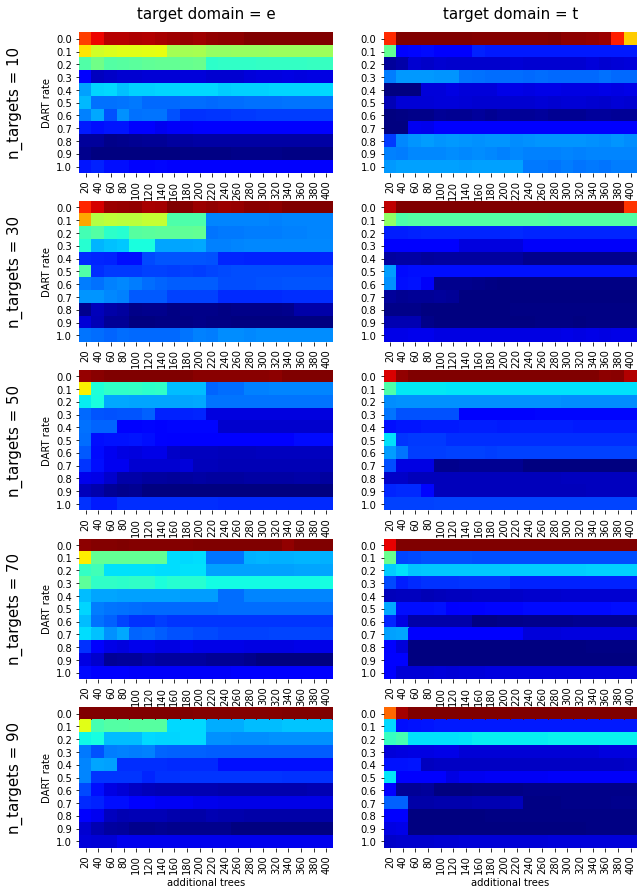

In [9]:
fig_mushroom, df_mushroom = get_plots(PATH_MUSHROOM_RESULT, N_TARGETS_HALF, False,
                                      is_drop_left=True, is_drop_bottom=False)

## banknote

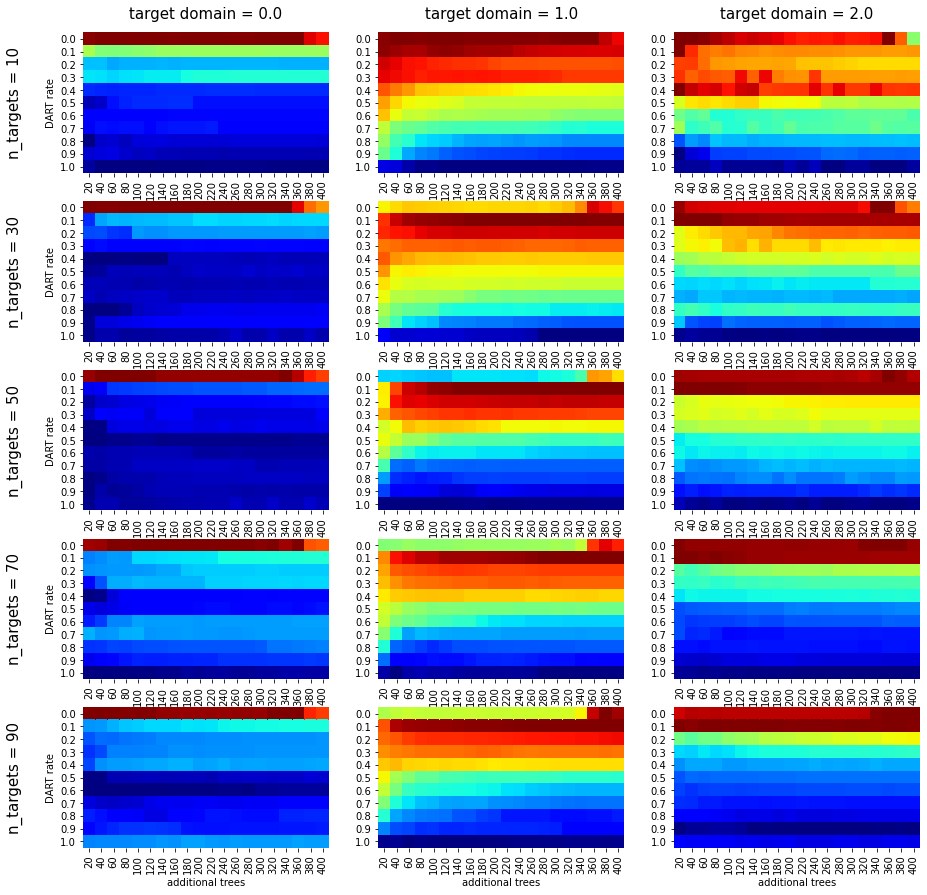

In [10]:
fig_banknote, df_banknote = get_plots(PATH_BANKNOTE_RESULT, N_TARGETS_HALF, False,
                                      is_drop_left=True, is_drop_bottom=False)

## default

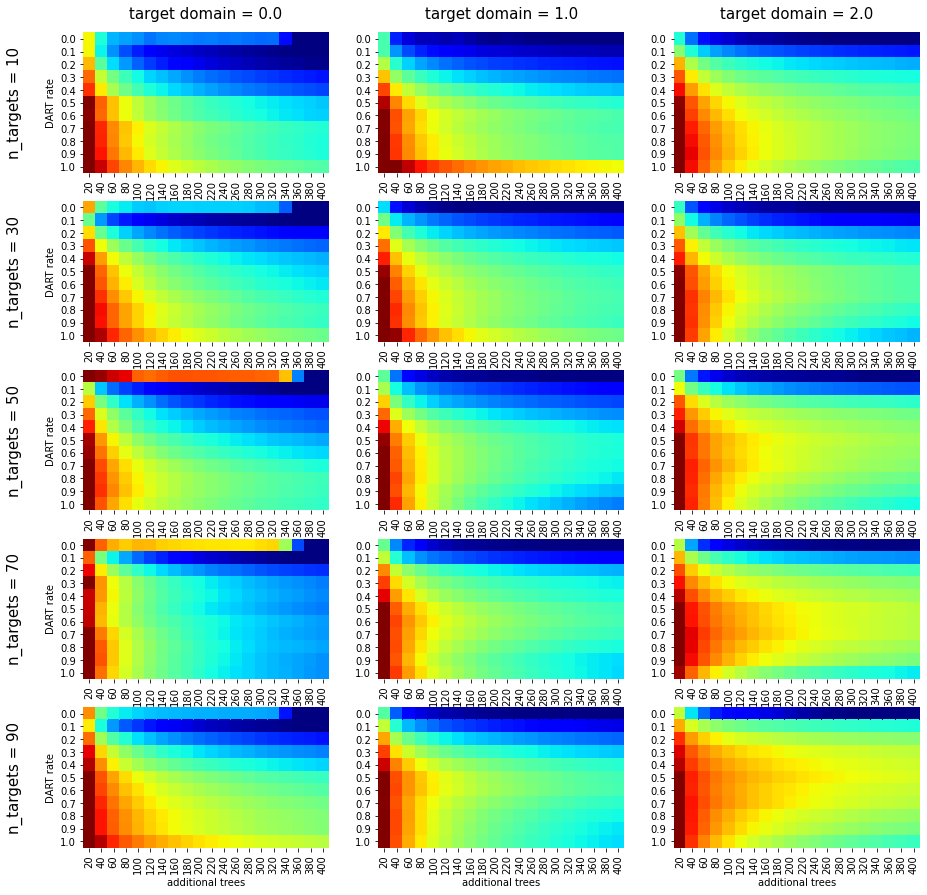

In [11]:
fig_default, df_default = get_plots(PATH_DEFAULT_RESULT, N_TARGETS_HALF, False,
                                    is_drop_left=True, is_drop_bottom=False)

## concrete

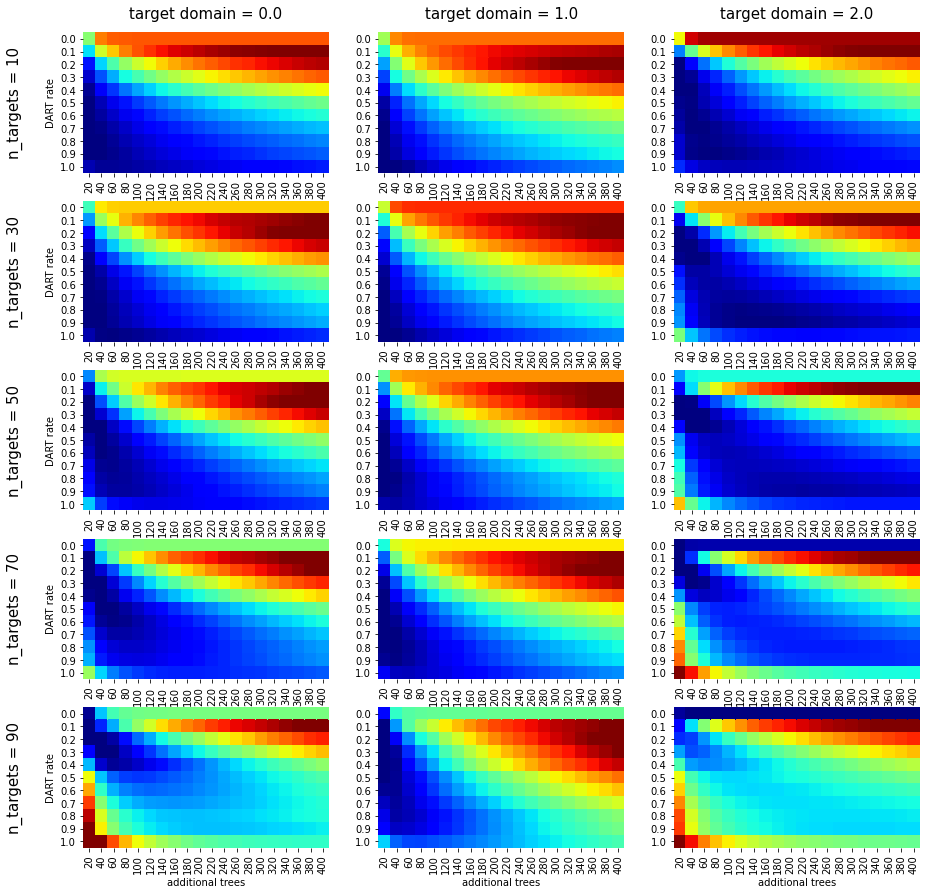

In [12]:
fig_concrete, df_concrete = get_plots(PATH_CONCRETE_RESULT, N_TARGETS_HALF, False,
                                      is_drop_left=True, is_drop_bottom=False)

## qsar

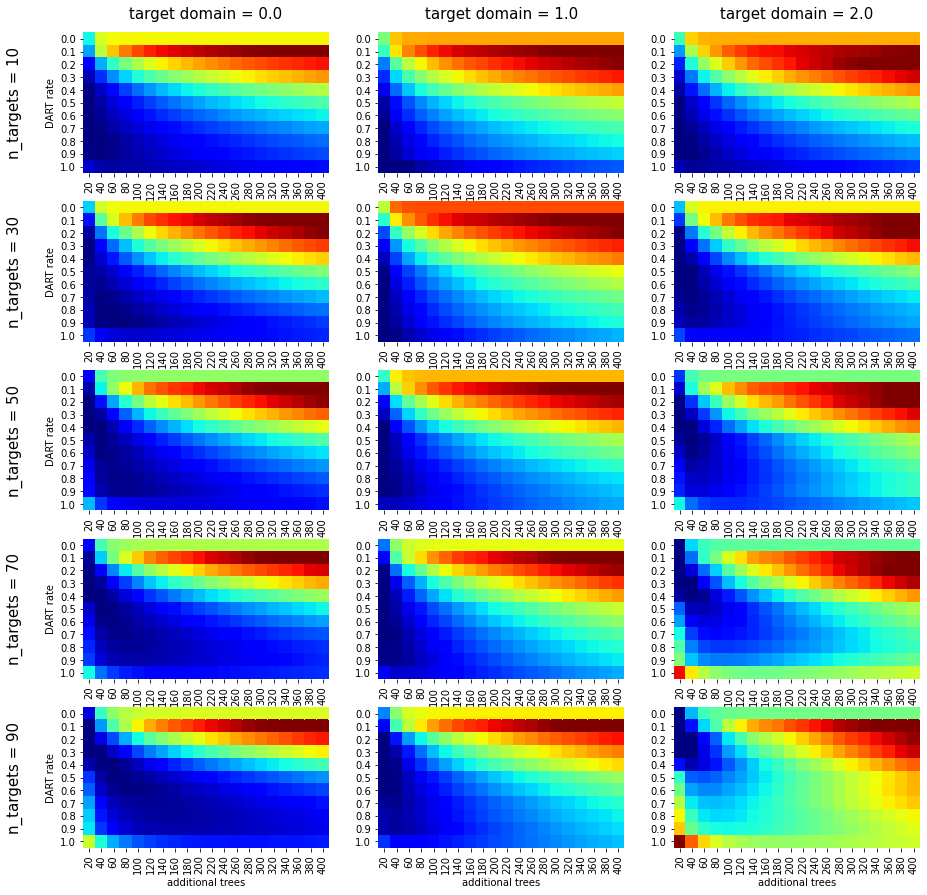

In [13]:
fig_qsar, df_qsar = get_plots(PATH_QSAR_RESULT, N_TARGETS_HALF, False,
                              is_drop_left=True, is_drop_bottom=False)

## bike

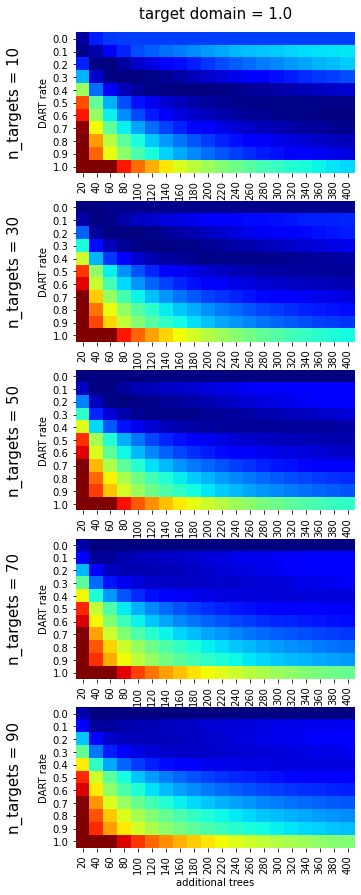

In [14]:
fig_bike, df_bike = get_plots(PATH_BIKE_RESULT, N_TARGETS_HALF, False,
                              is_drop_left=True, is_drop_bottom=False)

## traffic

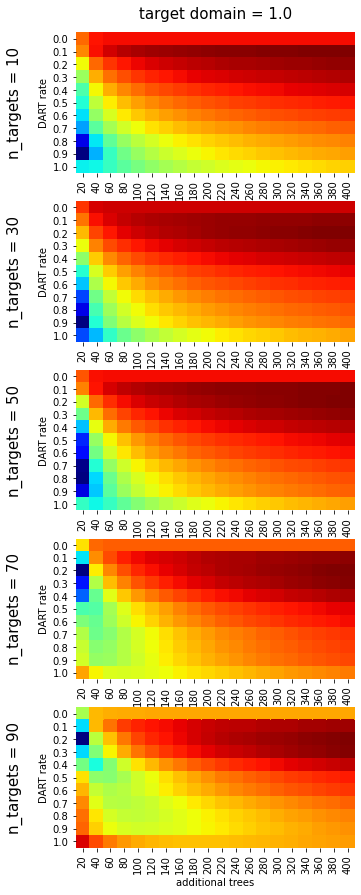

In [15]:
fig_traffic, df_traffic = get_plots(PATH_TRAFFIC_RESULT, N_TARGETS_HALF, True,
                                    is_drop_left=True, is_drop_bottom=False)